In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

2023-12-30 00:43:04.219245: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-30 00:43:04.365546: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-30 00:43:05.224370: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.8/lib64:/usr/local/cuda-11.3/lib64
2023-12-30 00:43:05.224458: W te

In [ ]:
import pickle

with open('./Pretraning_data/ZINC_10M_data','rb') as file:
    train = pickle.load(file)

In [ ]:
train[1]

In [2]:
from rdkit import Chem
from tqdm import tqdm
def Chem_generator(smiles):
    res_list = []
    for i in tqdm(smiles):
        mol = Chem.MolFromSmiles(i)
        temp = []
        index = 0
        while(len(set(temp))!=4 and index != 100):
            index+=1
            temp.append(Chem.MolToSmiles(mol,doRandom=True))
        res_list+=list(set(temp))
    return res_list

In [ ]:
len(train_1)

In [3]:
import tensorflow as tf

class MultiheadAttention_tensor(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads,classical_rate = 0.25,Tensor_dimention = 20):
        super(MultiheadAttention_tensor, self).__init__()
        assert d_model % num_heads == 0
        self.num_heads = num_heads
        self.depth = d_model // num_heads
        self.rate = classical_rate
        assert int(num_heads/classical_rate) == num_heads/classical_rate


        self.d_model = d_model
        self.wq = tf.keras.layers.Dense(int(d_model*classical_rate))
        self.wk = tf.keras.layers.Dense(int(d_model*classical_rate))
        self.wv = tf.keras.layers.Dense(int(d_model*classical_rate))

        self.wq_tensor = TNLayer(Tensor_dimention)
        self.wk_tensor = TNLayer(Tensor_dimention)
        self.wv_tensor = TNLayer(Tensor_dimention)

        self.dense = tf.keras.layers.Dense(d_model)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, int(self.num_heads*self.rate), self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    def split_heads_tensor(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, int(self.num_heads*(1-self.rate)), self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    def call(self, q, mask=None):
        batch_size = tf.shape(q)[0]
        k = q
        v = q
        q_class = self.split_heads(self.wq(q), batch_size)
        k_class = self.split_heads(self.wk(k), batch_size)
        v_class = self.split_heads(self.wv(v), batch_size)
        
        
        q_tensor = self.split_heads_tensor(self.wq_tensor(q),batch_size)
        k_tensor = self.split_heads_tensor(self.wq_tensor(k),batch_size)
        v_tensor = self.split_heads_tensor(self.wq_tensor(v),batch_size)
        q,k,v = tf.concat([q_class,q_tensor],axis=1),tf.concat([k_class,k_tensor],axis=1),tf.concat([v_class,v_tensor],axis=1)

        scaled_attention, attention_weights = self.scaled_dot_product_attention(q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))

        output = self.dense(concat_attention)
        return output, attention_weights

    def scaled_dot_product_attention(self, q, k, v, mask):
        matmul_qk = tf.matmul(q, k, transpose_b=True)
        dk = tf.cast(tf.shape(k)[-1], tf.float32)
        scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

        if mask is not None:
            scaled_attention_logits += (mask * -1e9)

        attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
        output = tf.matmul(attention_weights, v)
        return output, attention_weights

In [4]:
from Module import custom_layers

In [5]:
from tdc.single_pred import Tox
from Module import RDK as rk
import atomInSmiles
from Module import Fine_tune

In [6]:
from multiprocessing import Pool
from tqdm import tqdm
from multiprocessing import Process, Value, Array
from multiprocessing import Process,Manager,current_process
from Module import RDK as rk
import atomInSmiles 

train_set = []

def process_data(item):
    train_set.append(atomInSmiles.encode(item,True).split(' '))
    
    
if __name__ == '__main__':
    manager = Manager()
    train_set = manager.list(train_set)
    pool = Pool(60)
    pool.map(process_data, train_1)
    pool.close()
    pool.join()



NameError: name 'train_1' is not defined

In [ ]:
from multiprocessing import Pool
from tqdm import tqdm
from multiprocessing import Process, Value, Array
from multiprocessing import Process,Manager,current_process
from Module import RDK as rk
import atomInSmiles 

train_set = []
def process_data(item):
    train_set.append(rk.smile_tokenize([item])[0])


if __name__ == '__main__':
    manager = Manager()
    train_set = manager.list(train_set)
    pool = Pool(60)
    pool.map(process_data, train)
    pool.close()
    pool.join()


In [ ]:
temp = []

for i in tqdm(train_set):
    temp.append(i)
    
    
train_set = temp

In [6]:
import matplotlib.pyplot as plt
length_list = {}


for index,i in enumerate(train_set):
    try:
        length_list[len(i)]=length_list[len(i)]+1
    except:
        length_list[len(i)] = 1
    
plt.bar(length_list.keys(),length_list.values())
plt.xlabel(xlabel='Token_size')
plt.ylabel('counts')    

NameError: name 'train_set' is not defined

In [ ]:
temp_dict = {}
for i in train_set:
    for j in i:
        try:
            temp_dict[j] = temp_dict[j] + 1
        except:
            temp_dict[j] = 1
remove_dict = {}
for i in temp_dict.keys():
    if temp_dict[i]<50:
        print(i,temp_dict[i])
        remove_dict[i] = 1

remove_list = []
for index,i in enumerate(train_set):
    for j in i:
        try:
            remove_dict[j]
            remove_list.append(index)
            break
        except:
            continue

remove_list.sort(reverse=True)

In [ ]:
for i in remove_list:
    train_set.pop(i)
print(len(train_set))

In [3]:
import pickle
with open('./Pretraning_data/Random_ZINC_50M_ATM_tokken.pkl','rb') as file:
    train_set = pickle.load(file)

In [ ]:
import pickle
molecule_dictionary = {'<start>':1,'<end>':2,'<unknown1>':3,'<unknown2>':4,'<unknown3>':5,'<unknow4>':6,'<unknown5>':7}

for molecule in train_set:
    for atom in molecule:
        try:
            molecule_dictionary[atom]
        except:
            molecule_dictionary[atom] = len(molecule_dictionary)+1
with open('./BERT/atomInSmile/1M_random_ZINC_word2index.pkl','rb') as file:
    molecule_dictionary = pickle.load(file)
len(molecule_dictionary)

In [7]:
import pickle
with open('./BERT/atomInSmile/1M_random_ZINC_word2index.pkl','rb') as file:
    molecule_dictionary = pickle.load(file)
len(molecule_dictionary)

1092

In [7]:
from tqdm import tqdm
import numpy as np 

def word_to_index(train_set,dict):
    result = []

    for molecule in tqdm(train_set):
        temp_list = []
        temp_list.append(1)
        if len(molecule)<5:
            continue
        for atom in molecule:
            temp_list.append(dict[atom])
            
        while len(temp_list)<200:
            temp_list.append(0)
        if len(temp_list) == 200:
            result.append(temp_list)

    return result
embedding_word = word_to_index(train_set[:10000000],molecule_dictionary)   
embedding_word = np.array(embedding_word)

NameError: name 'train_set' is not defined

In [8]:
from tdc.single_pred import Tox
from Module import RDK
import atomInSmiles

def word_to_index(train_set,dict):
    result = []
    for molecule in tqdm(train_set):
        temp_list = []
        temp_list.append(1)
        for atom in molecule:
            temp_list.append(dict[atom])
        while len(temp_list)!=200:
            temp_list.append(0)
        result.append(temp_list)
    return result
train_val,tox_info = Tox(name = 'herg_karim').get_data(format = 'DeepPurpose')
train_set_val = []

train_val = Chem_generator(train_val[:5000])


for i in train_val:
    train_set_val.append(atomInSmiles.encode(i,True).split(' '))
val_remove_list = []
for index,i in enumerate(train_set_val):
    for j in i:

        molecule_dictionary[j]

val_remove_list.sort(reverse=True)

for i in val_remove_list:
    train_set_val.pop(i)

embedding_word_val = word_to_index(train_set_val,molecule_dictionary)   
embedding_word_val = np.array(embedding_word_val)

Found local copy...
Loading...
Done!
100%|██████████| 19998/19998 [00:00<00:00, 70100.61it/s]


In [9]:
import random
max = 16
mask_input_val = []
for j in tqdm(train_set_val):
        value = []
        number = int(len(j)*0.15)
        if number>max:
                max = number
        if number == 0:
                number = 1
        value += random.sample(range(1,len(j)),number)
        mask_input_val.append(value)
        
        
for j in mask_input_val:
        while(len(j)<max):
                j.append(-1)


random_value_val = embedding_word_val.copy()        
for _,index in enumerate(mask_input_val):
        for j in index:
                if j != -1:
                        prob = np.random.rand(1)[0]
                        if prob < 0.8:
                                random_value_val[_][j] = 5
                        elif prob > 0.9:
                                temp1 = random.sample(range(0,301),1)[0]
                                random_value_val[_][j] = temp1
                                
output_val = tf.multiply(tf.reduce_sum(tf.one_hot(mask_input_val,200),axis=1),embedding_word_val)

100%|██████████| 19998/19998 [00:00<00:00, 196499.30it/s]
2023-12-30 00:43:53.687037: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-30 00:43:54.240327: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78900 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:ca:00.0, compute capability: 8.0


In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import *
early_stopping_cb = EarlyStopping(patience=6, monitor='loss',restore_best_weights=True)

In [11]:
def custom_loss(y_true, y_pred):
    output = tf.one_hot(tf.cast(tf.boolean_mask(y_true,tf.cast(y_true,bool)),tf.int32),len(molecule_dictionary))
    loss = tf.keras.losses.CategoricalCrossentropy()(output,y_pred)
    return loss

In [12]:
def Custom_metric(y_true,y_pred):
    predictions = tf.argmax(y_pred,axis=1)
    true = tf.boolean_mask(y_true,tf.cast(y_true,bool))
    return  tf.metrics.Accuracy()(predictions,true)
def Mask_acc(y_true, y_pred):
    score = tf.py_function(func=Custom_metric, inp=[y_true, y_pred], Tout=tf.float32,  name='Custom_acc') 
    return score

In [13]:
class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim,mask_zero=True)
        self.pos_emb = tf.keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim,mask_zero = True)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=1, limit=maxlen+1, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [14]:
from Module import custom_layers

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.layers import Embedding
from Module.custom_layers import BERT_tensor
#from Module.custom_layers import BERT_tensor
inputs = Input(shape = (200,),dtype=tf.int32)
mask = Input(shape = (16), dtype=tf.int32)
outputs = BERT_tensor(256,6,1024,len(molecule_dictionary),Tensor_dimention=2)(inputs,mask,pretrain=True)

model = Model(inputs = [inputs,mask], outputs = [outputs])
model.summary()
optmizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
model.compile(optimizer=optmizer,loss = custom_loss,metrics = Mask_acc)
model.load_weights('./BERT/atomInSmile/small_tensor_Random_ZINC_L_model_weights')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 16)]         0           []                               
                                                                                                  
 bert_tensor (BERT_tensor)      (None, 1092)         11778628    ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
Total params: 11,778,628
Trainable params: 11,778,628
Non-trainable params: 0
________________

In [563]:
#params = model.get_weights()

In [14]:
optmizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optmizer,loss = custom_loss,metrics = Mask_acc)

In [15]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=2000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)
    self.batch_count
    self.warmup_steps = warmup_steps

  def __call__(self, step):
    self.batch_count += 1
    step = float(step+1)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(1000.) * tf.math.minimum(arg1, arg2)

In [16]:
class CustomLearningRateScheduler(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, warmup_steps=40000):
        super(CustomLearningRateScheduler, self).__init__()
        self.warmup_steps = warmup_steps
        self.step = tf.Variable(0, trainable=False)

    def __call__(self, step):
        self.step.assign_add(1)  # 각 배치가 지나갈 때마다 step 증가
        lr = tf.cond(
            self.step <= self.warmup_steps,
            lambda: (1e-4 - 1e-6) / self.warmup_steps * tf.cast(self.step, tf.float32) + 1e-6,
            lambda: (1e-4) * (self.warmup_steps ** 0.5) / (tf.cast(self.step, tf.float32) ** 0.5)
        )
        return lr

In [17]:
lr = CustomLearningRateScheduler()
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer= optimizer, loss = custom_loss, metrics= Mask_acc)

In [18]:
#model.load_weights('./BERT/atomInSmile/F_Random_ZINC_L_model_weights.h5')

In [170]:

import random
size = 200000
for k in range(1):
        for i in range(0,int(len(embedding_word)/size)):
                if k == 0:
                        i = i + 16
                        
                """
                if i == int(len(embedding_word)/size):
                        break
                if i+50 <80:
                        lr = (1e-4-1e-6)*(i)/80 + 1e-6
                else:
                        lr = 1e-4*np.sqrt(80)/np.sqrt(i)"""
                optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
                model.compile(optimizer= optimizer, loss = custom_loss, metrics= Mask_acc)
                max = 16
                mask_input = []
                print(i)
                for j in tqdm(train_set[size*i:size*(i+1)]):
                        value = []
                        number = int(len(j)*0.15)
                        if number>max:
                                number = max
                        if number == 0:
                                number = 1
                        value += random.sample(range(1,len(j)),number)
                        mask_input.append(value)
                        
                        
                for j in mask_input:
                        while(len(j)<max):
                                j.append(-1)
                
                inputs1 = embedding_word[size*i:size*(i+1)]
                inputs2 = mask_input
                output = tf.multiply(tf.reduce_sum(tf.one_hot(inputs2,200),axis=1),inputs1)

                
                random_value = inputs1.copy()        
                for _,index in enumerate(inputs2):
                        for j in index:
                                if j != -1:
                                        prob = np.random.rand(1)[0]
                                        if prob < 0.8:
                                                random_value[_][j] = 5
                                        elif prob > 0.9:
                                                temp1 = random.sample(range(0,len(molecule_dictionary)),1)[0]
                                                random_value[_][j] = temp1
                                                
                
                
                print(f'This is {i} number step')
                with tf.device('/device:GPU:0'):
                        if i % 1 == 0:
                                model.fit([np.array(random_value),np.array(inputs2)],np.array(output,dtype = int),epochs=1,batch_size=32,validation_data=([np.array(random_value_val),np.array(mask_input_val)],np.array(output_val)))
                        else:
                                model.fit([np.array(random_value),np.array(inputs2)],np.array(output,dtype = int),epochs=1,batch_size=32)
                        print(model.optimizer.lr)
                        model.save_weights('./BERT/atomInSmile/temp_small_tensor_Random_ZINC_L_model_weights')

16


100%|██████████| 200000/200000 [00:01<00:00, 186369.98it/s]


This is 16 number step
6250/6250 [==============================] - 728s 112ms/step - loss: 0.0617 - Mask_acc: 0.9798 - val_loss: 0.1935 - val_Mask_acc: 0.9457
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>
17


100%|██████████| 200000/200000 [00:01<00:00, 186028.14it/s]


KeyboardInterrupt: 

In [6]:
inputs = Input(shape = (200,),dtype=tf.int32)
outputs = BERT_tensor(256,6,1024,732,Tensor_dimention=2)(inputs,None)

model_temp = Model(inputs = [inputs], outputs = [outputs])
model_temp.summary()
optmizer = tf.keras.optimizers.Adam(learning_rate=0.0002)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 200)]             0         
                                                                 
 bert_tensor_2 (BERT_tensor)  (None, 200, 256)         11497984  
                                                                 
Total params: 11,497,984
Trainable params: 11,497,984
Non-trainable params: 0
_________________________________________________________________


In [7]:
paras = model.get_weights()

In [8]:
model_temp.set_weights(paras[:250])

In [9]:
model_temp.save_weights('./BERT/atomInSmile/Pre_BERT')

In [76]:
from Module.custom_layers import Attention_mask

hidden,mask = model.layers[2].embedding(random_value[:10])
mask = Attention_mask(mask)
index = 3
for i in range(index):
    hidden = model.layers[2].encoder[i](hidden,mask)
_,output = model.layers[2].encoder[index].att(hidden,mask)

<Axes: >

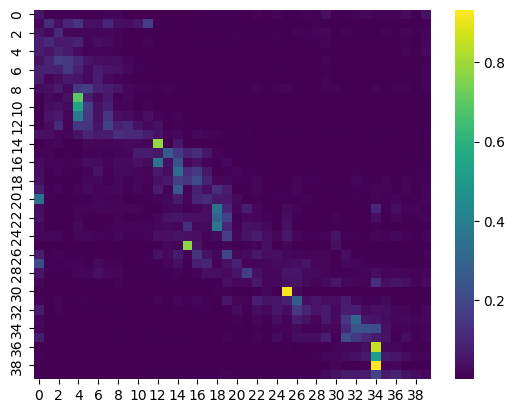

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(output[4][0][0:40,0:40], cmap='viridis', fmt=".2f")

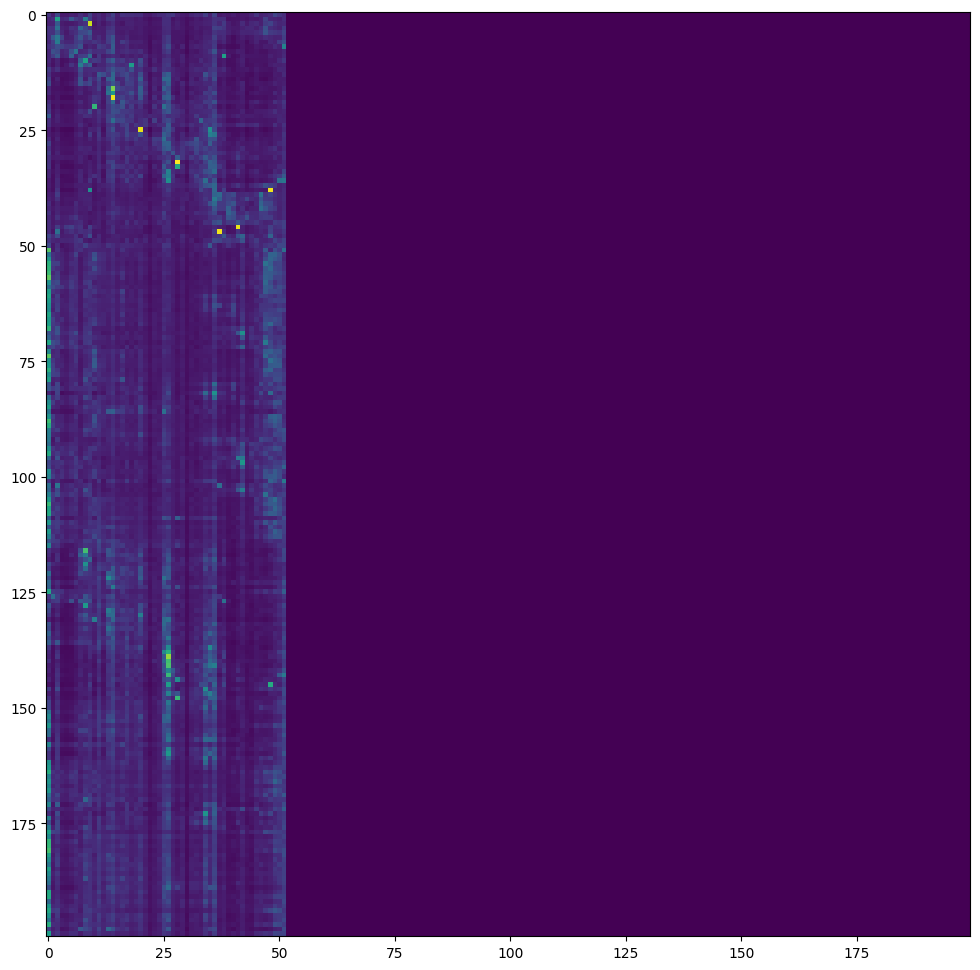

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(24,12))
plt.imshow(tf.reduce_mean(output[0],axis=0), cmap='viridis')

In [928]:
model.layers[2].encoder[1].att.dense.weights[0].numpy().shape

(1536, 256)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(socre[0][0][:20,:20], cmap='viridis', annot=True, fmt=".2f")

In [18]:
import os
import pickle

# 폴더 경로 설정
folder_path = './Final_data_token/CLS/'  # 해당 경로를 실제 폴더 경로로 바꿔주세요

# 빈 리스트 초기화
merged_data = []

# 폴더 내의 모든 .pkl 파일을 탐색
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'rb') as file:
        # .pkl 파일 열기
        try:
            data = pickle.load(file)
            # 데이터를 하나의 리스트에 추가
            merged_data+=data[0]
            print(file_path,len(data[0]))
        except:
            pass
remove_list = []

for index,i in enumerate(merged_data):
    if len(i)>=180:
        remove_list.append(index)

remove_list.sort(reverse=True)

for i in remove_list:
    merged_data.pop(i)

./Final_data_token/CLS/BBBP_vNN-ADMET 6696
./Final_data_token/CLS/Hepatotoxicity-Cytotoxicity-HepG2_vNN-ADMET 121906
./Final_data_token/CLS/CYP2C9_Inhibitor_vNN-ADMET 161017
./Final_data_token/CLS/CYP2C19_Inhibitor_vNN-ADMET 162656
./Final_data_token/CLS/CYP2D6_Inhibitor_vNN-ADMET 155682
./Final_data_token/CLS/HLM_metab_vNN-ADMET 64378
./Final_data_token/CLS/BBBP_MoleculeNet 40202
./Final_data_token/CLS/DILI_vNN-ADMET 27866
./Final_data_token/CLS/CYP1A2_Inhibitor_vNN-ADMET 150714
./Final_data_token/CLS/BBBP_MoleculeNet_clean 40201
./Final_data_token/CLS/CYP3A4_Inhibitor_vNN-ADMET 204188


In [19]:
len(merged_data)

1134322

In [20]:
# 폴더 경로 설정
folder_path = './data_sets/'  # 해당 경로를 실제 폴더 경로로 바꿔주세요


# 폴더 내의 모든 .pkl 파일을 탐색
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'rb') as file:
        # .pkl 파일 열기
        try:
            data = pickle.load(file)
            # 데이터를 하나의 리스트에 추가
            merged_data+=data[0]
            print(file_path,len(data[0]))
        except:
            pass
remove_list = []

for index,i in enumerate(merged_data):
    if len(i)>=180:
        remove_list.append(index)

remove_list.sort(reverse=True)

for i in remove_list:
    merged_data.pop(i)

./data_sets/Skin Reaction_train 5466
./data_sets/hERG_Karim_val 53772
./data_sets/hERG_Karim_train 215023
./data_sets/Carcinogens_Lagunin_val 1120
./data_sets/AMES_val 28648
./data_sets/DILI_train 7502
./data_sets/hERG_train 10472
./data_sets/Carcinogens_Lagunin_train 4381
./data_sets/ClinTox_val 5419
./data_sets/Skin_Reaction_val 23586
./data_sets/DILI_val 1900
./data_sets/LD50_Zhu_train 107613
./data_sets/AMES_train 111253
./data_sets/hERG_val 2620


IsADirectoryError: [Errno 21] Is a directory: './data_sets/Full_sets'

In [21]:
len(merged_data)

1713097

In [22]:
len(molecule_dictionary)

1092

In [23]:
from tqdm import tqdm
import numpy as np 

def word_to_index(train_set,dict):
    result = []

    for molecule in tqdm(train_set):
        temp_list = []
        temp_list.append(1)
        for atom in molecule:
            try:
                temp_list.append(dict[atom])
            except:
                print(atom)
                dict[atom] = len(dict)+1
        while len(temp_list)<200:
            temp_list.append(0)
        if len(temp_list) == 200:
            result.append(temp_list)

    return result
embedding_word_merge = word_to_index(merged_data,molecule_dictionary)   
embedding_word_merge = np.array(embedding_word_merge)

 21%|██        | 358189/1713097 [00:07<00:23, 57735.04it/s]

[[O+];!R;N]


 58%|█████▊    | 993287/1713097 [00:18<00:11, 60007.94it/s]

[Cl;!R;O]


100%|██████████| 1713097/1713097 [00:31<00:00, 53769.90it/s]


In [85]:
len(molecule_dictionary)

1094

In [24]:
molecule_dictionary

{'<start>': 1,
 '<end>': 2,
 '<unknown1>': 3,
 '<unknown2>': 4,
 '<unknown3>': 5,
 '<unknow4>': 6,
 '<unknown5>': 7,
 '[S;!R;CCOO]': 8,
 '(': 9,
 '[c;R;CCS]': 10,
 '1': 11,
 '[c;R;CCN]': 12,
 '[CH;R;CCN]': 13,
 '2': 14,
 '[N;R;CCC]': 15,
 '[C;!R;CNO]': 16,
 '=': 17,
 '[O;!R;C]': 18,
 ')': 19,
 '[c;R;CCC]': 20,
 '3': 21,
 '[cH;R;CN]': 22,
 '[n;R;CN]': 23,
 '[n;R;CCN]': 24,
 '[CH3;!R;N]': 25,
 '[CH2;R;CN]': 26,
 '[CH2;R;CC]': 27,
 '[nH;R;CN]': 28,
 '[O;!R;S]': 29,
 '[CH3;!R;S]': 30,
 '[NH;!R;CC]': 31,
 '[C;!R;NOO]': 32,
 '[O;!R;CC]': 33,
 '[CH;R;CCO]': 34,
 '[CH2;R;CS]': 35,
 '[S;R;CCOO]': 36,
 '[cH;R;CC]': 37,
 '[c;R;CCF]': 38,
 '[F;!R;C]': 39,
 '[C;!R;COO]': 40,
 '[[O-];!R;C]': 41,
 '[c;R;CCO]': 42,
 '[OH;!R;C]': 43,
 '[[NH+];R;CCC]': 44,
 '[CH2;!R;CN]': 45,
 '[c;R;CNN]': 46,
 '[n;R;CCC]': 47,
 '[n;R;CC]': 48,
 '[CH;R;CCC]': 49,
 '[CH3;!R;C]': 50,
 '[c;R;CNO]': 51,
 '[nH;R;CC]': 52,
 '[n;R;CO]': 53,
 '[o;R;NN]': 54,
 '[S;!R;CNOO]': 55,
 '[NH;!R;CS]': 56,
 '[c;R;NOO]': 57,
 '[o;R;CC]': 

In [59]:
with open('./BERT/atomInSmile/1M_random_ZINC_word2index.pkl','wb') as file:
    pickle.dump(molecule_dictionary,file)

In [90]:
model.layers[2].embedding.set_weights(paras[248:250])

In [91]:
for i in range(8):
    model.layers[2].encoder[i].set_weights(paras[i*31:31*(i+1)])

In [33]:

import random
size = 200000
for k in range(1):
        for i in range(0,int(len(embedding_word_merge)/size)):
                lr = CustomLearningRateScheduler()
                if k == 0:
                        i = i
                """
                if i == int(len(embedding_word_merge)/size):
                        break
                if i+50 <80:
                        lr = (1e-4-1e-6)*(i)/80 + 1e-6
                else:
                        lr = 1e-4*np.sqrt(80)/np.sqrt(i)"""
                optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
                model.compile(optimizer= optimizer, loss = custom_loss, metrics= Mask_acc)
                max = 16
                mask_input = []
                print(i)
                for j in tqdm(merged_data[size*i:size*(i+1)]):
                        value = []
                        number = int(len(j)*0.15)
                        if number>max:
                                number = max
                        if number == 0:
                                number = 1
                        value += random.sample(range(1,len(j)),number)
                        mask_input.append(value)
                        
                        
                for j in mask_input:
                        while(len(j)<max):
                                j.append(-1)
                
                inputs1 = embedding_word_merge[size*i:size*(i+1)]
                inputs2 = mask_input
                output = tf.multiply(tf.reduce_sum(tf.one_hot(inputs2,200),axis=1),inputs1)

                
                random_value = inputs1.copy()        
                for _,index in enumerate(inputs2):
                        for j in index:
                                if j != -1:
                                        prob = np.random.rand(1)[0]
                                        if prob < 0.8:
                                                random_value[_][j] = 5
                                        elif prob > 0.9:
                                                temp1 = random.sample(range(0,len(molecule_dictionary)),1)[0]
                                                random_value[_][j] = temp1
                                                
                
                
                print(f'This is {i} number step')
                with tf.device('/device:GPU:0'):
                        if i % 1 == 0:
                                model.fit([np.array(random_value),np.array(inputs2)],np.array(output,dtype = int),epochs=1,batch_size=32,validation_data=([np.array(random_value_val),np.array(mask_input_val)],np.array(output_val)))
                        else:
                                model.fit([np.array(random_value),np.array(inputs2)],np.array(output,dtype = int),epochs=1,batch_size=32)
                        print(model.optimizer.lr)
                        with open('./BERT/atomInSmile/Pre_BERT.pkl','wb') as file:
                                paras = model.weights[:250]
                                pickle.dump(paras,file)
                        #model.save_weights('./BERT/atomInSmile/small_tensor_Random_ZINC_L_model_weights')

0


 39%|███▉      | 78491/200000 [00:00<00:00, 140769.46it/s]

100%|██████████| 200000/200000 [00:01<00:00, 151769.19it/s]


This is 0 number step


2023-12-30 00:48:55.004975: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-12-30 00:48:55.042122: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7eebf0332040 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-30 00:48:55.042163: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA A100 80GB PCIe, Compute Capability 8.0
2023-12-30 00:48:55.048330: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-30 00:48:55.222302: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1243/6250 [====>.........................] - ETA: 9:00 - loss: 33.8274 - Mask_acc: 0.8368

KeyboardInterrupt: 

In [119]:
with open('./BERT/atomInSmile/Pre_BERT.pkl','wb') as file:
    paras = model.weights[:250]
    pickle.dump(paras,file)

In [123]:
model_temp.set_weights(paras)

In [ ]:
model.save_weights('./BERT/atomInSmile/tensor_Random_ZINC_L_model_weights')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf


import tensorflow as tf
import tensornetwork as tn
import numpy as np
import tensornetwork as tn
class TNLayer(tf.keras.layers.Layer):
    def __init__(self,Tensor_dimention = 20):
        super(TNLayer, self).__init__()
        # Create the variables for the layer.
        

        self.A1 = tf.Variable(tf.random.normal(shape=[4,Tensor_dimention,4], stddev=1.0/192.0), trainable=True)
        self.A2 = tf.Variable(tf.random.normal(shape=[4,Tensor_dimention,Tensor_dimention,4], stddev=1.0/192.0), trainable=True)
        self.A3 = tf.Variable(tf.random.normal(shape=[4,Tensor_dimention,Tensor_dimention,4], stddev=1.0/192.0), trainable=True)
        self.A4 = tf.Variable(tf.random.normal(shape=[4,Tensor_dimention,3], stddev=1.0/192.0), trainable=True)
        

        self.bias = tf.Variable(tf.zeros(shape=(192)), trainable=True)
        
    def call(self, inputs):
        # Define the contraction.
        # We break it out so we can parallelize a batch using
        # tf.vectorized_map (see below).
        Nodes = [tn.Node(self.A1,'a0',backend="tensorflow")]
        Nodes+=[tn.Node(self.A2,f'a{1}',backend="tensorflow")]
        Nodes+=[tn.Node(self.A3,f'a{2}',backend="tensorflow")]
        Nodes+=[tn.Node(self.A4,f'a{3}',backend="tensorflow")]
        bias_var = self.bias
        input_vec = tf.reshape(inputs, [-1,200,4,4,4,4])
        T_node = tn.Node(input_vec, backend="tensorflow",name = 't')
        for i in range(len(Nodes)-1):
            if i == 0:
                Nodes[i][1]^Nodes[i+1][1]
            else:
                Nodes[i][2]^Nodes[i+1][1]
        for i in range(len(Nodes)):
            Nodes[i][0]^T_node[i+2]    
        contraction = T_node@Nodes[0]
        for i in range(1,len(Nodes)):
            contraction = contraction@Nodes[i]
        result = tf.reshape(contraction.tensor,[-1,200,192])
        result = result + bias_var
        return result


class TokenAndPositionEmbedding_mask(tf.keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim,mask=False):
        super().__init__()
        self.token_emb = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim,mask_zero=True)
        self.pos_emb = tf.keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim,mask_zero = True)
        self.positions = tf.range(start=1, limit=maxlen+1, delta=1)
    def call(self, x):
        positions = self.pos_emb(self.positions)
        mask = self.token_emb.compute_mask(x)
        x = self.token_emb(x)
        return x + positions,mask

class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim,mask=False):
        super().__init__()
        self.token_emb = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim,mask_zero=True)
        self.pos_emb = tf.keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim,mask_zero = True)
        self.positions = tf.range(start=1, limit=maxlen+1, delta=1)
    def call(self, x):
        positions = self.pos_emb(self.positions)
        x = self.token_emb(x)
        return x + positions


class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        l2_reg = tf.keras.regularizers.l2(0.01)
        self.att = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim//num_heads,kernel_regularizer=l2_reg,dropout=0.1)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(ff_dim, activation="relu"), tf.keras.layers.Dense(embed_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)
    
class TransformerBlock_Tensor(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1,Tensor_dimention=20):
        super().__init__()
        self.att = MultiheadAttention_tensor(d_model=embed_dim,num_heads=num_heads,Tensor_dimention=Tensor_dimention)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(ff_dim, activation="relu"), tf.keras.layers.Dense(embed_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs,mask=None):
        attn_output,_ = self.att(inputs,mask)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)
import tensorflow as tf

class MultiheadAttention_tensor(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads,classical_rate = 0.25,Tensor_dimention = 20):
        super(MultiheadAttention_tensor, self).__init__()
        assert d_model % num_heads == 0
        self.num_heads = num_heads
        self.depth = d_model // num_heads
        self.rate = classical_rate
        assert int(num_heads/classical_rate) == num_heads/classical_rate


        self.d_model = d_model
        self.wq = tf.keras.layers.Dense(int(d_model*classical_rate))
        self.wk = tf.keras.layers.Dense(int(d_model*classical_rate))
        self.wv = tf.keras.layers.Dense(int(d_model*classical_rate))

        self.wq_tensor = TNLayer(Tensor_dimention)
        self.wk_tensor = TNLayer(Tensor_dimention)
        self.wv_tensor = TNLayer(Tensor_dimention)

        self.dense = tf.keras.layers.Dense(d_model)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, int(self.num_heads*self.rate), self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    def split_heads_tensor(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, int(self.num_heads*(1-self.rate)), self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    def call(self, q, mask=None):
        batch_size = tf.shape(q)[0]
        k = q
        v = q
        q_class = self.split_heads(self.wq(q), batch_size)
        k_class = self.split_heads(self.wk(k), batch_size)
        v_class = self.split_heads(self.wv(v), batch_size)
        
        
        q_tensor = self.split_heads_tensor(self.wq_tensor(q),batch_size)
        k_tensor = self.split_heads_tensor(self.wk_tensor(k),batch_size)
        v_tensor = self.split_heads_tensor(self.wv_tensor(v),batch_size)
        q,k,v = tf.concat([q_class,q_tensor],axis=1),tf.concat([k_class,k_tensor],axis=1),tf.concat([v_class,v_tensor],axis=1)

        scaled_attention, attention_weights = self.scaled_dot_product_attention(q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))

        output = self.dense(concat_attention)
        return output, attention_weights

    def scaled_dot_product_attention(self, q, k, v, mask):
        matmul_qk = tf.matmul(q, k, transpose_b=True)
        dk = tf.cast(tf.shape(k)[-1], tf.float32)
        scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)
        scaled_attention_logits = tf.transpose(scaled_attention_logits,perm=[1,0,2,3])
        if mask is not None:
            scaled_attention_logits += (mask * -1e9)
        scaled_attention_logits = tf.transpose(scaled_attention_logits,perm=[1,0,2,3])
        attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
        output = tf.matmul(attention_weights, v)
        return output, attention_weights
    
    
def Attention_mask(embedding_mask):
    embedding_mask = tf.logical_not(embedding_mask)
    embedding_mask = tf.cast(embedding_mask,tf.float32)
    embedding_mask = tf.expand_dims(embedding_mask,axis=-1)
    embedding_mask = tf.tile(embedding_mask,[1,1,200])
    embedding_mask = tf.transpose(embedding_mask,perm=[0,2,1])
    return embedding_mask

class BERT_tensor(tf.keras.layers.Layer):
    def __init__(self,emb_dim,num_heads,ff_dim,CL_num = 3,Tensor_dimention=20):
        super(BERT_tensor, self).__init__()
        #self.encoder = tf.keras.Sequential([TransformerBlock(emb_dim,num_heads,ff_dim) for i in range(8)])
        self.encoder = TransformerBlock_Tensor(emb_dim,num_heads,ff_dim,Tensor_dimention=Tensor_dimention)
        self.embedding = TokenAndPositionEmbedding_mask(200,3500,256)
        self.dense = layers.Dense(250,activation = 'gelu')
        self.classify = layers.Dense(CL_num,activation = 'softmax')
    def call(self, inputs, mask_index,pretrain = False):
        if pretrain:
            mask_index = tf.one_hot(mask_index,200)
            boolean_mask = tf.cast(tf.reduce_sum(mask_index,axis=1),bool)
            inputs = tf.cast(inputs,dtype=tf.int32)
            
        hidden,pad_mask = self.embedding(inputs)
        Att_mask = Attention_mask(pad_mask)
        for i in range(8):
            hidden = self.encoder(hidden,Att_mask)
    
        if pretrain:
            output = tf.reshape(hidden,[-1,200,256])
            output = self.dense(output)
            output = layers.Dropout(0.1)(output)
            output = self.classify(output)
            output = tf.boolean_mask(output,boolean_mask)
            return output
        else:
            return hidden
        
class BERT(tf.keras.layers.Layer):
    def __init__(self,emb_dim,num_heads,ff_dim,CL_num = 3):
        super(BERT, self).__init__()
        self.encoder = tf.keras.Sequential([TransformerBlock(emb_dim,num_heads,ff_dim) for i in range(8)])
        #self.encoder = TransformerBlock(emb_dim,num_heads,ff_dim)
        self.embedding = TokenAndPositionEmbedding(200,3500,256)
        self.dense = layers.Dense(250,activation = 'gelu')
        self.classify = layers.Dense(CL_num,activation = 'softmax')
    def call(self, inputs, mask_index,pretrain = False):
        if pretrain:
            mask_index = tf.one_hot(mask_index,200)
            boolean_mask = tf.cast(tf.reduce_sum(mask_index,axis=1),bool)
            inputs = tf.cast(inputs,dtype=tf.int32)
            
        hidden = self.embedding(inputs)
        
        hidden = self.encoder(hidden)
    
        if pretrain:
            output = tf.reshape(hidden,[-1,200,256])
            output = self.dense(output)
            output = layers.Dropout(0.1)(output)
            output = self.classify(output)
            output = tf.boolean_mask(output,boolean_mask)
            return output
        else:
            return hidden

In [ ]:
temp_weights = model.get_weights()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.layers import Embedding
inputs = Input(shape = (200,),dtype=tf.int32)
mask = Input(shape = (16), dtype=tf.int32)
outputs = BERT(256,8,1024,732)(inputs,mask,pretrain=True)

model = Model(inputs = [inputs,mask], outputs = [outputs])
model.summary()
optmizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
model.compile(optimizer=optmizer,loss = custom_loss,metrics = Mask_acc)
all_weights = temp_weights[:16]*8 + temp_weights[16:]
model.set_weights(all_weights)

In [ ]:
import random
size = 100000
for k in range(1,11):
        for i in range(0,int(len(embedding_word)/size)):
                if k == 1:
                        i = i
                if i == int(len(embedding_word)/size):
                        break
                
                max = 16
                mask_input = []
                for j in tqdm(train_set[size*i:size*(i+1)]):
                        value = []
                        number = int(len(j)*0.15)
                        if number>max:
                                max = number
                        if number == 0:
                                number = 1
                        value += random.sample(range(1,len(j)),number)
                        mask_input.append(value)
                        
                        
                for j in mask_input:
                        while(len(j)<max):
                                j.append(-1)
                
                
                
                
                
                
                inputs1 = embedding_word[size*i:size*(i+1)]
                inputs2 = mask_input
                output = tf.multiply(tf.reduce_sum(tf.one_hot(inputs2,200),axis=1),inputs1)

                
                random_value = inputs1.copy()        
                for _,index in enumerate(inputs2):
                        for j in index:
                                if j != -1:
                                        prob = np.random.rand(1)[0]
                                        if prob < 0.8:
                                                random_value[_][j] = 0
                                        elif prob > 0.9:
                                                temp1 = random.sample(range(0,301),1)[0]
                                                random_value[_][j] = temp1
                                                
                
                
                print(f'This is {i} number step')
                with tf.device('/device:GPU:0'):
                        model.fit([np.array(random_value),np.array(inputs2)],np.array(output),epochs=20,batch_size=256,callbacks = [early_stopping_cb])
                        print(model.optimizer.lr)
                        model.save_weights('./BERT/atomInSmile/F_Random_ZINC_L_model_weights')

In [ ]:
from tdc.utils import retrieve_label_name_list
from tdc.single_pred import Tox
from Models.BERT import BERT_train
from Models.BERT import BERT_train_pre
from Module.Fine_tunning import fine_tuning

tox = ['hERG','hERG_Karim','AMES','DILI','Skin Reaction','Carcinogens_Lagunin','ToxCast','herg_central']
train = []
for i in tox:
    try:
        label_list = retrieve_label_name_list(i)
        temp,_ = Tox(name = i, label_name = label_list[0]).get_data(format = 'DeepPurpose')
        for j in temp:
            train.append(j)
    except:
        temp,_ = Tox(name = i).get_data(format = 'DeepPurpose')
        for j in temp:
            train.append(j)



In [ ]:
config = {'Tox':'ALL_TOX'}
BERT_model = BERT_train_pre("./BERT/SmiletoPE/L_model_weights.h5",3500)
fine_tuning(BERT_model,train,config)
BERT_model.save_weights(f"./BERT/SmiletoPE/Fine_tunned/ALL_TOX.h5")

In [ ]:
import tensorflow as tf
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=2000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    step = float(step+1)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(1e-4) * tf.math.minimum(arg1, arg2)



import tensorflow as tf
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=2000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    step = float(step+1)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)
    return 1 * tf.math.minimum(arg1, arg2)
import matplotlib.pyplot as plt
temp_learning_rate_schedule = CustomSchedule(256,10000)
callback = tf.keras.callbacks.LearningRateScheduler(temp_learning_rate_schedule, verbose=0)

from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='loss',   # loss 값을 모니터링합니다.
    factor=0.2,       # 학습률을 줄이는 비율입니다.
    patience=5,       # 개선이 없을 때 몇 번의 에포크를 기다릴지 설정합니다.
    min_lr=1e-6       # 최소 학습률입니다. 
)


In [ ]:
temp_learning_rate_schedule(1)

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
    def __init__(self, target_loss):
        super(CustomCallback, self).__init__()
        self.target_loss = target_loss

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('loss') is not None and logs.get('loss') <= self.target_loss:
            print(f"\nReached target loss ({self.target_loss}). Stopping training.")
            self.model.stop_training = True
target_loss_value = 0.1  # 여기에 원하는 loss 값 설정
custom_callback = CustomCallback(target_loss_value)

In [ ]:
from Models.BERT import BERT_train
from Module.classification_SPE import ModelPlotter
from tensorflow.keras.metrics import AUC
tox = ['herg','AMES','herg_Karim','DILI','Skin Reaction']
auc = AUC()

for t in tox:
    import tensorflow as tf
    from tensorflow.keras.layers import MaxPool2D
    from tensorflow.keras.layers import Conv2D
    from tensorflow.keras.layers import Input
    from tensorflow.keras.layers import Flatten,Dense
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Dropout
    inputs = Input(shape=(2048,),name='input')
    outputs = Dense(250,activation = 'relu')(inputs)
    outputs = Dropout(0.3)(outputs)
    outputs = Dense(40,activation = 'relu')(outputs)
    outputs = Dropout(0.3)(outputs)
    outputs = Dense(10,activation = 'relu')(outputs)
    outputs = Dropout(0.3)(outputs)
    outputs = Dense(1,activation = 'sigmoid')(outputs)

    model_NN = Model(inputs= [inputs], outputs=[outputs])
    model_NN.summary()
    model_NN.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics=['acc',auc])



    BERT_model = BERT_train("./BERT/SmiletoPE/Fine_tunned/ALL_TOX.h5",3500)
    BERT_model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics=['acc',auc])
    BERT_model1 = BERT_train("./BERT/SmiletoPE/L_model_weights.h5",3500)
    BERT_model1.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics=['acc',auc])
    
    
    models = {'BERT_TOX_40':BERT_model,'BERT_Large':BERT_model1,'bit':model_NN}
    train,tox_info= Tox(name = t).get_data(format = 'DeepPurpose')
    
    Model_analyze = ModelPlotter(models,train,tox_info,[callback,reduce_lr,custom_callback],config = {'Tox':'ALL_TOX'})
    Model_analyze.model_fitting()

    test_list = ['loss','acc','val_acc','val_auc_1']
    for test in BERT_model.history.history.keys():
        try:
            if test[:3] == 'val':
                print('Tox : ',t)
                Model_analyze.plot_training_history([test])
                plt.show()
        except:
            continue